### Weather Trend Report

#### Summary
The report provides a brief analysis of weather trends for London (UK) and global average, using annual data from about 1750 till about 2015.

#### Data and tools
Data was provided by Udacity and extraced using SQL queries detailed below:

```
SELECT * 
FROM city_data
WHERE
    city = 'London'
    AND country = 'United Kingdom';
```

and

```
SELECT * 
FROM global_data;
```

The tools used were: Jupyter Notebook, SQL, Python and Python libraries.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Load data
From CSV files, where SQL query results were saved.

In [11]:
city_temp = pd.read_csv('london_uk_weather_yearly.csv')
city_temp.head(10)

,year,city,country,avg_temp
0,1743,London,United Kingdom,7.54
1,1744,London,United Kingdom,10.34
2,1745,London,United Kingdom,4.13
3,1746,London,United Kingdom,NaN
4,1747,London,United Kingdom,NaN
5,1748,London,United Kingdom,NaN
6,1749,London,United Kingdom,NaN
7,1750,London,United Kingdom,10.25
8,1751,London,United Kingdom,9.99
9,1752,London,United Kingdom,6.54


In [13]:
city_temp.tail(5)

,year,city,country,avg_temp
266,2009,London,United Kingdom,10.52
267,2010,London,United Kingdom,9.38
268,2011,London,United Kingdom,11.19
269,2012,London,United Kingdom,10.00
270,2013,London,United Kingdom,9.91


In [14]:
global_temp = pd.read_csv('global_weather_yearly.csv')
global_temp.head(10)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


In [15]:
global_temp.tail(5)

,year,avg_temp
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57
265,2015,9.83


In [4]:
#merge data into one table
temp = pd.merge(city_temp, global_temp, on=['year'], how='outer')
temp.head(10)

,year,city,country,avg_temp_x,avg_temp_y
0,1743,London,United Kingdom,7.54,NaN
1,1744,London,United Kingdom,10.34,NaN
2,1745,London,United Kingdom,4.13,NaN
3,1746,London,United Kingdom,NaN,NaN
4,1747,London,United Kingdom,NaN,NaN
5,1748,London,United Kingdom,NaN,NaN
6,1749,London,United Kingdom,NaN,NaN
7,1750,London,United Kingdom,10.25,8.72
8,1751,London,United Kingdom,9.99,7.98
9,1752,London,United Kingdom,6.54,5.78


In [5]:
#clean table
temp.rename(columns={'avg_temp_x':'london_temperature_yearly','avg_temp_y':'global_temperature_yearly'}, inplace=True)
temp.drop(columns=['city','country'], axis = 1, inplace=True)
temp.head(10)

,year,london_temperature_yearly,global_temperature_yearly
0,1743,7.54,NaN
1,1744,10.34,NaN
2,1745,4.13,NaN
3,1746,NaN,NaN
4,1747,NaN,NaN
5,1748,NaN,NaN
6,1749,NaN,NaN
7,1750,10.25,8.72
8,1751,9.99,7.98
9,1752,6.54,5.78


#### Calculate moving averages

In [6]:
#Calculate 10yr moving average
temp['london_temp_10yr_moving_average'] = temp['london_temperature_yearly'].rolling(10).mean()
temp['global_temp_10yr_moving_average'] = temp['global_temperature_yearly'].rolling(10).mean()

In [7]:
temp.head(20)

,year,london_temperature_yearly,global_temperature_yearly,london_temp_10yr_moving_average,global_temp_10yr_moving_average
0,1743,7.54,NaN,NaN,NaN
1,1744,10.34,NaN,NaN,NaN
2,1745,4.13,NaN,NaN,NaN
3,1746,NaN,NaN,NaN,NaN
4,1747,NaN,NaN,NaN,NaN
5,1748,NaN,NaN,NaN,NaN
6,1749,NaN,NaN,NaN,NaN
7,1750,10.25,8.72,NaN,NaN
8,1751,9.99,7.98,NaN,NaN
9,1752,6.54,5.78,NaN,NaN


In [8]:
temp.columns

Index(['year', 'london_temperature_yearly', 'global_temperature_yearly',
       'london_temp_10yr_moving_average', 'global_temp_10yr_moving_average'],
      dtype='object')

#### Line chart
Line chart with local and global temperature trends.

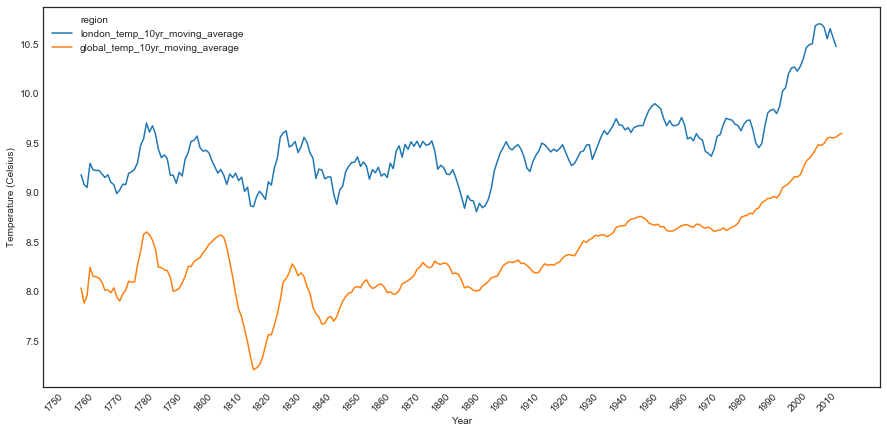

In [9]:
plt.style.use('seaborn-white')
plt.figure(figsize = [15,7])

ax = sns.lineplot(x='year', y='temperature_C', hue='region', 
             data=pd.melt(temp[['year','london_temp_10yr_moving_average', 'global_temp_10yr_moving_average']], ['year'],
                          var_name ='region', value_name='temperature_C'));
ticks = np.arange(1750,temp.year.max()+1,10)
plt.xticks(ticks,ticks,rotation=45)
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)");

#### Observations
All observations refer to the 10year moving averages of annual tempreatures of London (UK) and global average.

1) Globally and in London, the average annual temperatures starterd rising visibly since 1970 (last 50 years), and a mild upward trend may have been observed from about 1900-1920

2) Globally and in London, from about 1750 till 1900, the average annual temperatures have reverted to average (without any visible upward or downward trend), though there have been significant variations in this period

3) around 1815 it was particularly cold globally (London was only minorly below average for that century), which corresponds to Napoleonic war period, and Napoleon's armies friezing in Russia

4) London is consistently warmer than global average, though the spread differs through the years

5) In the last 10 years, London's annual tempreature moving average has turned downwards, while the continious rise is observed in global moving average